In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
import matplotlib.pyplot as plt

X = california.data
y = california.target

Text(0.5, 1.0, 'California Ev Fiyatları')

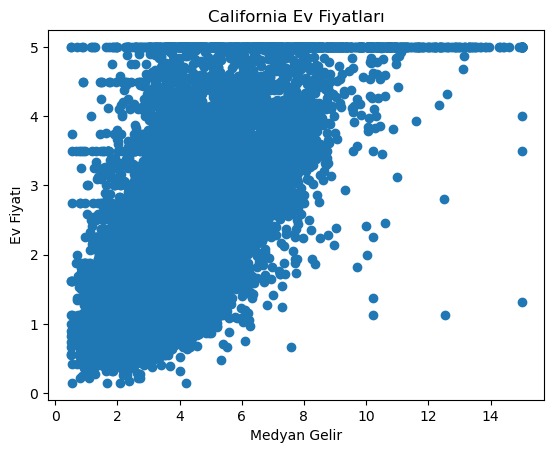

In [5]:
plt.scatter(X[:, 0], y)
plt.xlabel('Medyan Gelir')
plt.ylabel('Ev Fiyatı')
plt.title('California Ev Fiyatları')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata:", mse)

Ortalama Kare Hata: 0.5289841670367232


In [15]:
r2 = r2_score(y_test, y_pred)

In [16]:
print("R-kare:", r2)

R-kare: 0.5943232652466184


In [17]:
from scipy.optimize import minimize

In [18]:
def mse_loss(w):
    y_pred = X_train.dot(w)
    return mean_squared_error(y_train, y_pred)

In [20]:
import numpy as np

initial_weights = np.zeros(X_train.shape[1])

In [21]:
result = minimize(mse_loss, initial_weights)

In [22]:
optimized_weights = result.x

In [23]:
y_pred_optimized = X_test.dot(optimized_weights)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

In [24]:
print("Optimize Edilmiş Model Değerlendirmesi:")
print("Ortalama Kare Hata (MSE):", mse_optimized)
print("R-kare (R^2):", r2_optimized)

Optimize Edilmiş Model Değerlendirmesi:
Ortalama Kare Hata (MSE): 0.6120689668769208
R-kare (R^2): 0.530605724331127


In [25]:
from scipy.stats import shapiro

In [29]:
residuals_optimized = y_test - y_pred_optimized

In [30]:
stat_optimized, p_value_optimized = shapiro(residuals_optimized)

In [31]:
print("\nOptimize Edilmiş Model Hata Normalite Testi:")
print("Test İstatistiği:", stat_optimized)
print("p-değeri:", p_value_optimized)


Optimize Edilmiş Model Hata Normalite Testi:
Test İstatistiği: 0.9271167516708374
p-değeri: 6.919051297450217e-41
